# Estatística descritiva

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
from palmerpenguins import load_penguins
from scipy import stats

pd.options.plotting.backend = "plotly"

pio.renderers.default = "png"

penguins: pd.DataFrame = load_penguins().dropna().reset_index(drop=True).infer_objects()

penguins.loc[:, penguins.dtypes == object] = penguins.select_dtypes(object).astype("category")

## Tabela de distribuição de frequências

In [2]:
# Tabela de distribuição de frequências de variável qualitativa

pd.DataFrame(
    {
        "frequência absoluta": penguins.groupby("species").size(),
        "frequência relativa": penguins.groupby("species").size() / len(penguins),
    }
)

,frequência absoluta,frequência relativa
species,,
Adelie,146,0.438438
Chinstrap,68,0.204204
Gentoo,119,0.357357


In [3]:
# Tabela de distribuição de frequências de variável quantitativa

intervalos = pd.cut(penguins["body_mass_g"], 3)

pd.DataFrame(
    {
        "frequência absoluta": penguins.groupby(intervalos).size(),
        "frequência relativa": penguins.groupby(intervalos).size() / len(penguins),
    }
)

,frequência absoluta,frequência relativa
body_mass_g,,
"(2696.4, 3900.0]",150,0.450450
"(3900.0, 5100.0]",128,0.384384
"(5100.0, 6300.0]",55,0.165165


## Tabela de contingência

In [4]:
pd.crosstab(penguins["species"], penguins["island"])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


## Medidas-resumo de tendência central

In [5]:
# Média aritmética simples

penguins["body_mass_g"].mean()

4207.057057057057

In [6]:
# Média aritmética ponderada

np.average(penguins["body_mass_g"], weights=penguins["bill_length_mm"])

4265.880979685451

In [7]:
# Mediana

penguins["body_mass_g"].median()

4050.0

## Medidas-resumo separatrizes

In [8]:
# Percentis

penguins["body_mass_g"].quantile([0.01, 0.02, 0.98, 0.99])

0.01    2900.0
0.02    2916.0
0.98    5850.0
0.99    5984.0
Name: body_mass_g, dtype: float64

In [9]:
# Decis

penguins["body_mass_g"].quantile([0.1, 0.2, 0.80, 0.90])

0.1    3300.0
0.2    3475.0
0.8    4990.0
0.9    5440.0
Name: body_mass_g, dtype: float64

In [10]:
# Quartis

penguins["body_mass_g"].quantile([0.25, 0.50, 0.75])

0.25    3550.0
0.50    4050.0
0.75    4775.0
Name: body_mass_g, dtype: float64

## Medidas-resumo de dispersão

In [11]:
# Amplitude

np.ptp(penguins["body_mass_g"])

3600.0

In [12]:
# IQR

stats.iqr(penguins["body_mass_g"])

1225.0

In [13]:
# Variância

penguins["body_mass_g"].var()

648372.4876985418

In [14]:
# Desvio-padrão

penguins["body_mass_g"].std()

805.2158019428964

In [15]:
# Erro-padrão da média

stats.sem(penguins["body_mass_g"], ddof=1)

44.12555413389444

## Medidas de correlação

In [16]:
# Covariância

penguins["bill_length_mm"].cov(penguins["bill_depth_mm"], )

-2.4620913383262795

In [17]:
# Coeficiente de correlação de Pearson

penguins["bill_length_mm"].corr(penguins["bill_depth_mm"])

-0.22862563591302915

## Gráficos

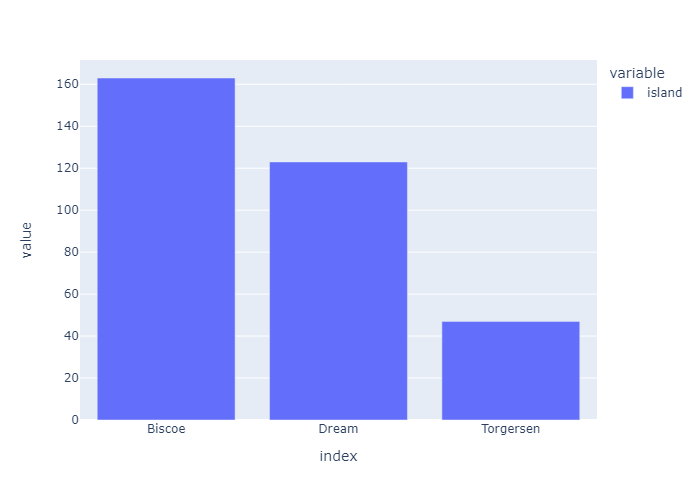

In [18]:
# Gráfico de barras

penguins["island"].value_counts().plot.bar()

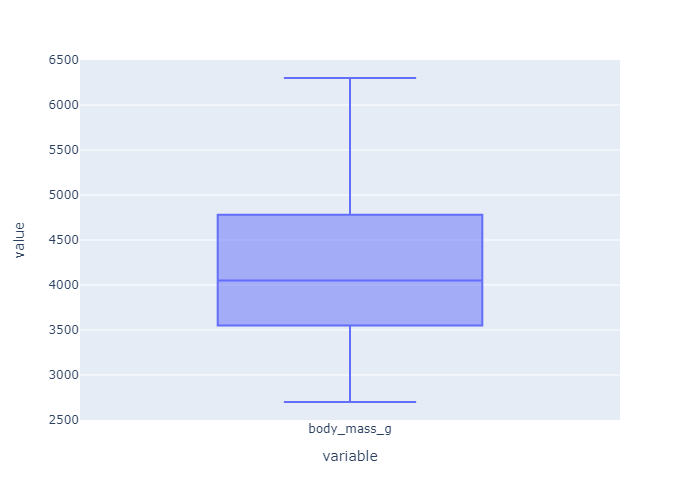

In [19]:
# Boxplot

penguins["body_mass_g"].plot.box()

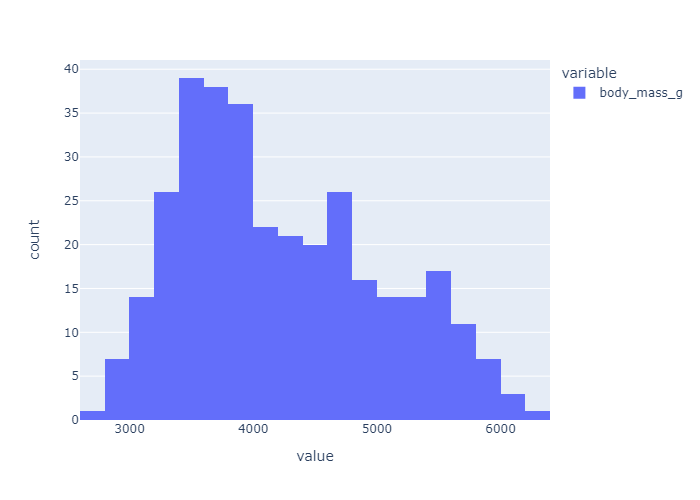

In [20]:
# Histograma

penguins["body_mass_g"].plot.hist()

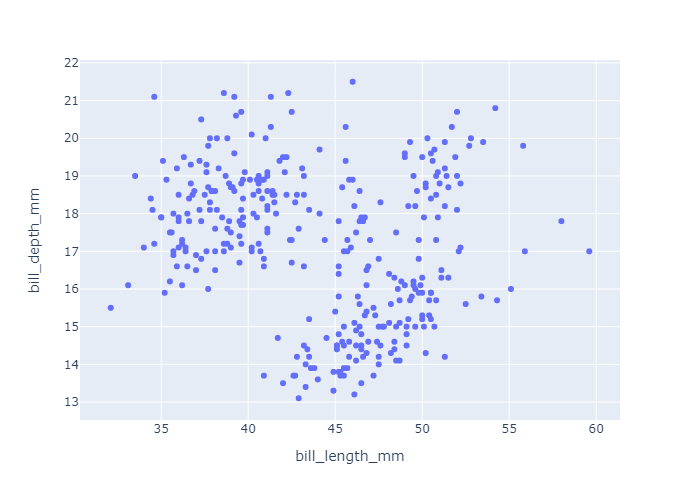

In [21]:
# Gráfico de dispersão

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")

## Padronização por _z-scores_

In [22]:
stats.zscore(penguins["body_mass_g"], ddof=1)

0     -0.567621
1     -0.505525
2     -1.188572
3     -0.940192
4     -0.691811
         ...   
328   -0.257145
329   -1.002287
330   -0.536573
331   -0.132954
332   -0.536573
Name: body_mass_g, Length: 333, dtype: float64